In [41]:
from cuml.cluster import HDBSCAN
from cuml.manifold import UMAP
from bertopic import BERTopic
from sklearn.feature_extraction.text import TfidfVectorizer as tf

import pandas as pd
import stopwordsiso as sw
import numpy as np
import hdbscan
import datetime

In [2]:
# Load the whole dataset embedding here.
st = datetime.datetime.now()
texts = np.load('Embedded_texts/rio16_Sports_texts_whole.npy')
ed = datetime.datetime.now()
print(ed-st)

0:00:14.910389


In [3]:
umap_model = UMAP(n_components=5, 
                  n_neighbors=10,
                  a=1.56,
                  b=0.9,
                  local_connectivity = 1,
                  transform_queue_size = 4)

In [26]:
cluster = HDBSCAN(min_samples = 10,
                  min_cluster_size = 800
                 )

In [100]:
clusters_rio16 = cluster.fit_predict(embedding_rio16[::100])

In [101]:
np.bincount(clusters_rio16+1)

array([116533,    117,    214,    103,    260,    158,     61,     63,
           75,    132,    156,    176,    226,     57,    375,     66,
           56,     69,     68,     51,    113,    143,    110,    189,
          393,    179,    100,    184,     96,     71,     94,    126,
          123,    120,    263,    216,    340,    254,    230,    143,
           59,    100,    266,     54,     77,    106,    466,    159,
           76,    120,     78,    101,     82,    114,    111,    119,
           60,     94,    133,     57,    179,    151,    134,    408,
           75,     50,     85,    390,     72,     55,    194,    775,
         2236,    102,     59,   3299,     76,     55,     97,    277,
           93,    404,    346,     61,     93,     64,   2233,     61,
         2121,    351,     65,     66,     55,     65,    810,     76,
          276,    145,     70,     54,     75,     55,    290,     56,
          132,     82,     63,    156,    120,    417,     97,    964,
      

In [86]:
np.bincount(clusters_rio16+1)

array([ 2112474,    12644, 12558780])

In [5]:
st = datetime.datetime.now()
embedding_rio16 = umap_model.fit_transform(texts)
clusters_rio16 = cluster.fit_predict(embedding_rio16)
ed = datetime.datetime.now()
print('Run Time: ', ed-st)

Run Time:  12:23:55.176559


In [9]:
st = datetime.datetime.now()
embedding_rio16 = umap_model.fit_transform(texts[::10])
clusters_rio16 = cluster.fit_predict(embedding_rio16)
ed = datetime.datetime.now()
print('Run Time: ', ed-st)

Run Time:  0:07:45.369705


In [28]:
st = datetime.datetime.now()
embedding_rio16 = umap_model.fit_transform(texts[::50])
clusters_rio16 = cluster.fit_predict(embedding_rio16)
ed = datetime.datetime.now()
print('Run Time: ', ed-st)

Run Time:  0:00:24.000997


In [5]:
st = datetime.datetime.now()
embedding_rio16 = umap_model.fit_transform(texts[::100])
clusters_rio16 = cluster.fit_predict(embedding_rio16)
ed = datetime.datetime.now()
print('Run Time: ', ed-st)

Run Time:  0:00:08.360819


In [6]:
st = datetime.datetime.now()
embedding_rio16 = umap_model.fit_transform(texts[::500])
clusters_rio16 = cluster.fit_predict(embedding_rio16)
ed = datetime.datetime.now()
print('Run Time: ', ed-st)

Run Time:  0:00:01.031525


In [7]:
st = datetime.datetime.now()
embedding_rio16 = umap_model.fit_transform(texts[::1000])
clusters_rio16 = cluster.fit_predict(embedding_rio16)
ed = datetime.datetime.now()
print('Run Time: ', ed-st)

Run Time:  0:00:00.543505


In [7]:
umap_model = UMAP(n_components=5, 
                  n_neighbors=10, 
                  a=1.56,
                  b=0.9,
                  local_connectivity = 1,
                  transform_queue_size = 8)

In [8]:
cluster = HDBSCAN(min_samples = 2,
                  min_cluster_size = 921
                 )

In [16]:
labels = []
reduced_sbert = []
leng = 0
rio16_tmp = rio16
date = rio16_tmp['created_at'].unique()
st = datetime.datetime.now()
for i in date:
    tweets = rio16_tmp['SBERT'][rio16_tmp['created_at']==i]
    tweets_text = np.vstack(tweets.to_list())
    tmp = len(tweets_text)
    embedding_rio16 = umap_model.fit_transform(tweets_text)
    clusters_rio16 = cluster.fit_predict(embedding_rio16)
    labels.append(pd.Series(clusters_rio16, index=tweets.index, name = 'Category'))
    leng += tmp
ed = datetime.datetime.now()
print('Run Time: ', ed-st)

Run Time:  0:59:30.389635


In [12]:
labels = []
reduced_sbert = []
leng = 0
rio16_tmp = rio16.iloc[::1000]
date = rio16_tmp['created_at'].unique()
st = datetime.datetime.now()
for i in date:
    tweets = rio16_tmp['SBERT'][rio16_tmp['created_at']==i]
    tweets_text = np.vstack(tweets.to_list())
    tmp = len(tweets_text)
    embedding_rio16 = umap_model.fit_transform(tweets_text)
    clusters_rio16 = cluster.fit_predict(embedding_rio16)
    labels.append(pd.Series(clusters_rio16, index=tweets.index, name = 'Category'))
    leng += tmp
ed = datetime.datetime.now()
print('Run Time: ', ed-st)

Run Time:  0:00:04.970387


In [11]:
labels = []
reduced_sbert = []
leng = 0
rio16_tmp = rio16.iloc[::500]
date = rio16_tmp['created_at'].unique()
st = datetime.datetime.now()
for i in date:
    tweets = rio16_tmp['SBERT'][rio16_tmp['created_at']==i]
    tweets_text = np.vstack(tweets.to_list())
    tmp = len(tweets_text)
    embedding_rio16 = umap_model.fit_transform(tweets_text)
    clusters_rio16 = cluster.fit_predict(embedding_rio16)
    labels.append(pd.Series(clusters_rio16, index=tweets.index, name = 'Category'))
    leng += tmp
ed = datetime.datetime.now()
print('Run Time: ', ed-st)

Run Time:  0:00:05.937224


In [13]:
labels = []
reduced_sbert = []
leng = 0
rio16_tmp = rio16.iloc[::100]
date = rio16_tmp['created_at'].unique()
st = datetime.datetime.now()
for i in date:
    tweets = rio16_tmp['SBERT'][rio16_tmp['created_at']==i]
    tweets_text = np.vstack(tweets.to_list())
    tmp = len(tweets_text)
    embedding_rio16 = umap_model.fit_transform(tweets_text)
    clusters_rio16 = cluster.fit_predict(embedding_rio16)
    labels.append(pd.Series(clusters_rio16, index=tweets.index, name = 'Category'))
    leng += tmp
ed = datetime.datetime.now()
print('Run Time: ', ed-st)

Run Time:  0:00:08.178270


In [14]:
labels = []
reduced_sbert = []
leng = 0
rio16_tmp = rio16.iloc[::50]
date = rio16_tmp['created_at'].unique()
st = datetime.datetime.now()
for i in date:
    tweets = rio16_tmp['SBERT'][rio16_tmp['created_at']==i]
    tweets_text = np.vstack(tweets.to_list())
    tmp = len(tweets_text)
    embedding_rio16 = umap_model.fit_transform(tweets_text)
    clusters_rio16 = cluster.fit_predict(embedding_rio16)
    labels.append(pd.Series(clusters_rio16, index=tweets.index, name = 'Category'))
    leng += tmp
ed = datetime.datetime.now()
print('Run Time: ', ed-st)

Run Time:  0:00:11.801543


In [15]:
labels = []
reduced_sbert = []
leng = 0
rio16_tmp = rio16.iloc[::10]
date = rio16_tmp['created_at'].unique()
st = datetime.datetime.now()
for i in date:
    tweets = rio16_tmp['SBERT'][rio16_tmp['created_at']==i]
    tweets_text = np.vstack(tweets.to_list())
    tmp = len(tweets_text)
    embedding_rio16 = umap_model.fit_transform(tweets_text)
    clusters_rio16 = cluster.fit_predict(embedding_rio16)
    labels.append(pd.Series(clusters_rio16, index=tweets.index, name = 'Category'))
    leng += tmp
ed = datetime.datetime.now()
print('Run Time: ', ed-st)

Run Time:  0:01:01.729292


In [103]:
rio16['SBERT'][a[0]]

array([ 0.00551676, -0.0228066 ,  0.03577773, -0.0046611 ,  0.01792454,
        0.0578275 ,  0.00683537,  0.00673896,  0.01958863,  0.01107196,
        0.01112151,  0.04160924, -0.04454024,  0.02936227, -0.05043257,
        0.01385042,  0.010141  , -0.00225151,  0.02672533, -0.00719693,
        0.05864823,  0.01050557, -0.0284198 , -0.0409534 ,  0.04912286,
       -0.02963116,  0.0148205 ,  0.03169426,  0.02303264,  0.06548244,
        0.00742048,  0.00411908,  0.07805076, -0.05904845, -0.03090082,
       -0.0129879 ,  0.01229833, -0.10045515,  0.04948417, -0.00685906,
       -0.11115418, -0.08926757,  0.01578073, -0.07414322, -0.04109678,
       -0.0215736 ,  0.06692214,  0.02827342, -0.0454416 ,  0.01319793,
       -0.01327475,  0.03462605, -0.02693098, -0.03057322,  0.03568515,
       -0.07592252,  0.01412189,  0.04255629,  0.01958683, -0.01444202,
        0.0223933 , -0.06220512, -0.03522637,  0.04999023, -0.08740122,
       -0.04176755,  0.03770417, -0.02608019,  0.02643838,  0.03

In [43]:
label_Se = pd.concat(labels)
label_Se.to_csv('Data_Performance_Comparison/HDBSCAN_RESULT_2.csv')

In [44]:
sbert_Se = pd.concat(reduced_sbert)
sbert_Se.to_csv('Data_Performance_Comparison/UMAP_RESULT_2.csv')

In [45]:
label_Se

0           148
1            -1
2           210
3            -1
4            -1
           ... 
14694485     43
14694486     -1
14694487     -1
14694488     41
14694489     -1
Name: Category, Length: 14683898, dtype: int32

In [46]:
TEXT_1 = np.load('Data_Performance_Comparison/UMAP_RESULT_1.npy')

In [57]:
umap_model = UMAP(n_components=2, 
                  n_neighbors=20,
                  a=1.26,
                  b=1.1,
                  local_connectivity = 1,
                  transform_queue_size = 4)

In [43]:
st = datetime.datetime.now()
Viz = umap_model.fit_transform(UMAP_1[clusters_2!=-1][::10])
ed = datetime.datetime.now()
print('Run Time: ', ed-st)

Run Time:  0:00:03.343868


In [58]:
st = datetime.datetime.now()
Viz = umap_model.fit_transform(UMAP_1[::100])
ed = datetime.datetime.now()
print('Run Time: ', ed-st)

Run Time:  0:00:00.707707


In [14]:
import matplotlib.pyplot as plt

In [90]:
UMAP_1 = np.load('Data_Performance_Comparison/UMAP_RESULT_1.npy')

In [108]:
UMAP_2 = pd.read_csv('Data_Performance_Comparison/UMAP_RESULT_2.csv')
UMAP_2

Unnamed: 0                                          NEW_SBERT
0                  0  [-0.9966311454772949, 0.26653099060058594, 2.9...
1                  1  [-0.5913424491882324, 1.1656925678253174, -0.7...
2                  2  [-4.347883224487305, -12.053871154785156, -1.3...
3                  3  [1.2320647239685059, -0.24640417098999023, -1....
4                  4  [0.014904499053955078, 0.8190176486968994, -0....
...              ...                                                ...
14683893    14694485  [-5.754558086395264, -4.645763397216797, -1.05...
14683894    14694486  [-1.3886723518371582, -2.4768381118774414, 0.9...
14683895    14694487  [-10.38840103149414, -5.9007673263549805, 3.08...
14683896    14694488  [-0.07748222351074219, 4.228339672088623, 7.79...
14683897    14694489  [0.477044939994812, -8.92288875579834, 3.04851...

[14683898 rows x 2 columns]

In [107]:
clusters_2 = pd.read_csv('Dataset/New_label.csv', lineterminator='\n', index_col = 0)['New_Category'].to_numpy()

In [42]:
clusters_2 = np.load('Data_Performance_Comparison/HDBSCAN_RESULT_2.npy')

In [102]:
clusters_1 = clusters_rio16

In [9]:
UMAP_1 = embedding_rio16

IndexError: index 2 is out of bounds for axis 1 with size 2

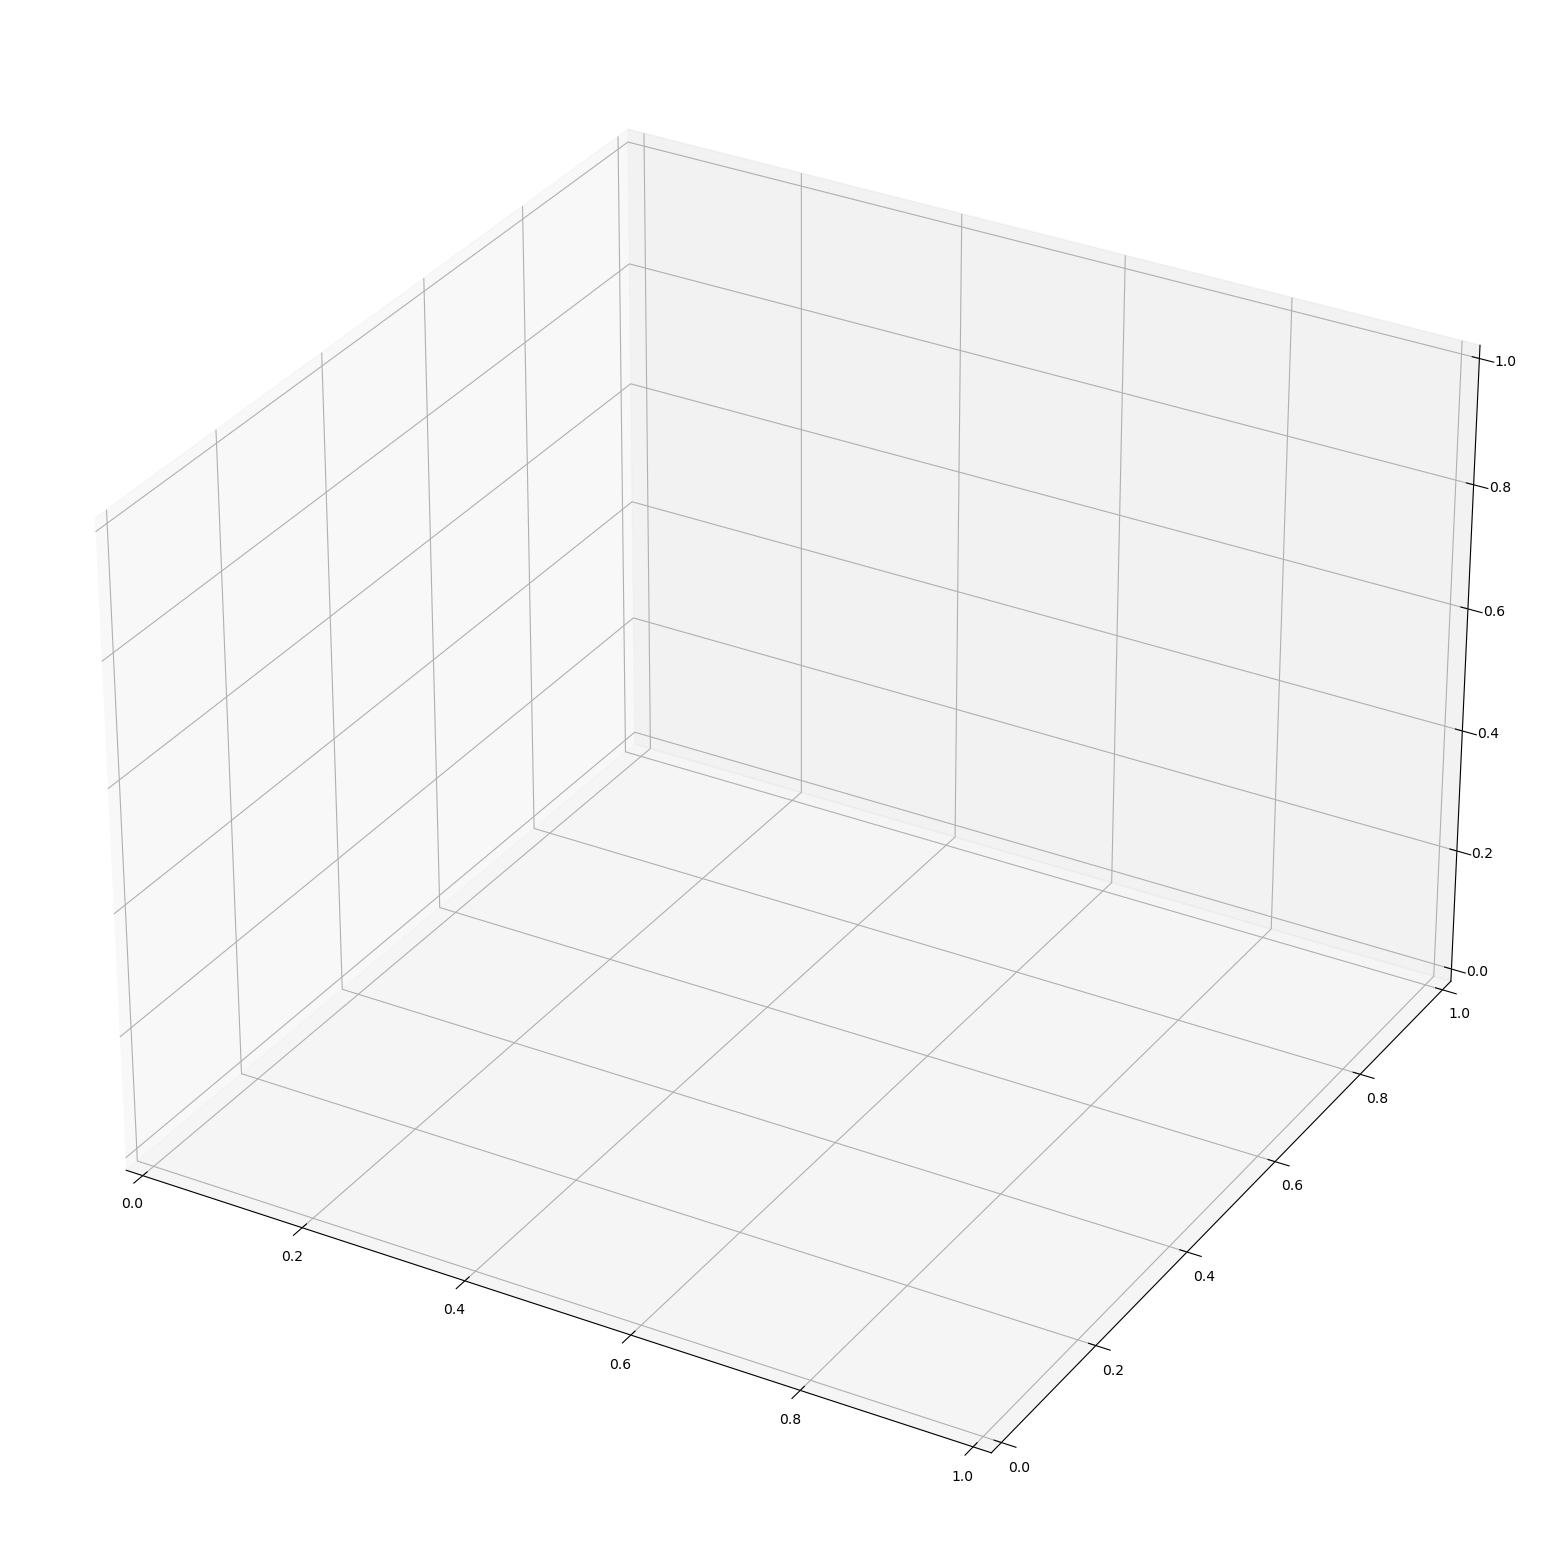

In [59]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')
ax.scatter(Viz[clusters_2[::50]!=-1][:,0], 
           Viz[clusters_2[::50]!=-1][:,1], 
           Viz[clusters_2[::50]!=-1][:,2],
           s = 2, c = 100*clusters_2[::50][clusters_2[::50]!=-1]/(max(clusters_2)-min(clusters_2)), 
           cmap = 'gist_rainbow', alpha = 0.1)

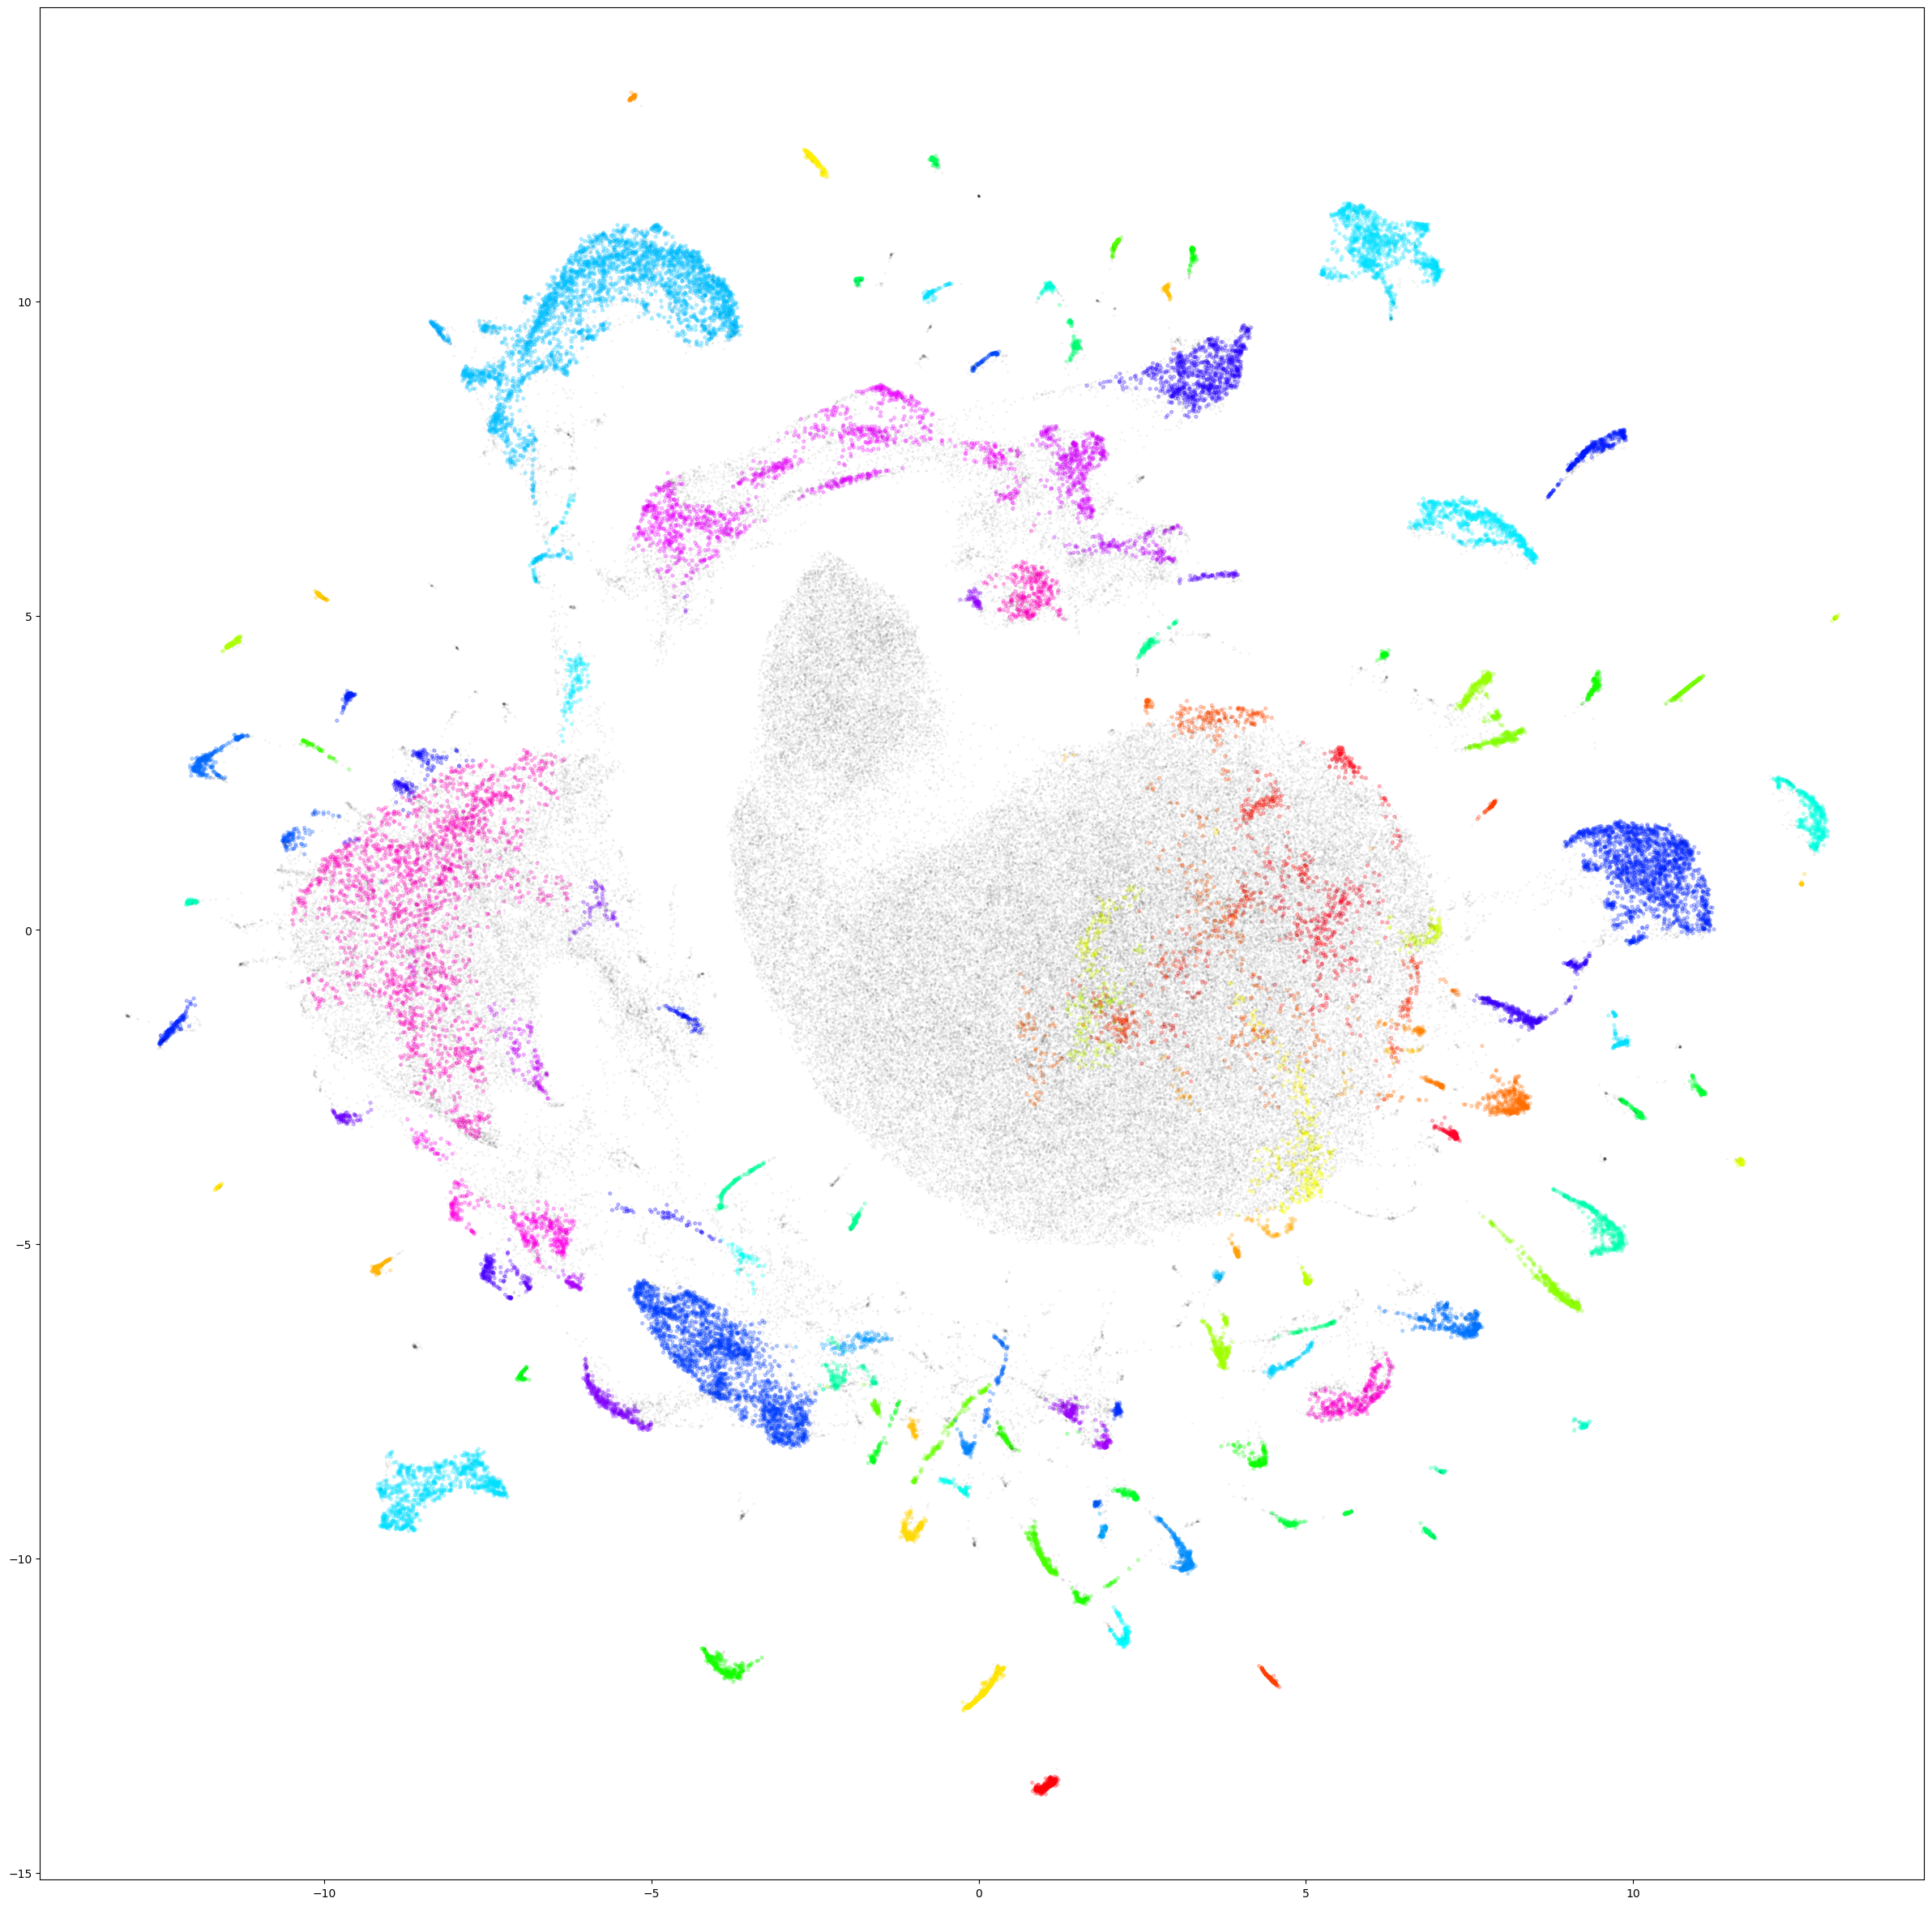

In [117]:
tmp = clusters_1!=-1
plt.figure(figsize=(30,30))
# ax = fig.add_subplot(projection='3d')
plt.scatter(Viz[tmp,0], 
           Viz[tmp,1], 
           # Viz[clusters_2[::50]!=-1][:,2],
           s = 8, c = clusters_1[tmp], 
           cmap = 'gist_rainbow', alpha = 0.25)
tmp2=clusters_1==-1
plt.scatter(Viz[tmp2,0], 
           Viz[tmp2,1], 
           # Viz[clusters_2[::50]!=-1][:,2],
           s = 2, c = 'black', alpha = 0.03)
plt.savefig('Images/Origin_Plot.png')

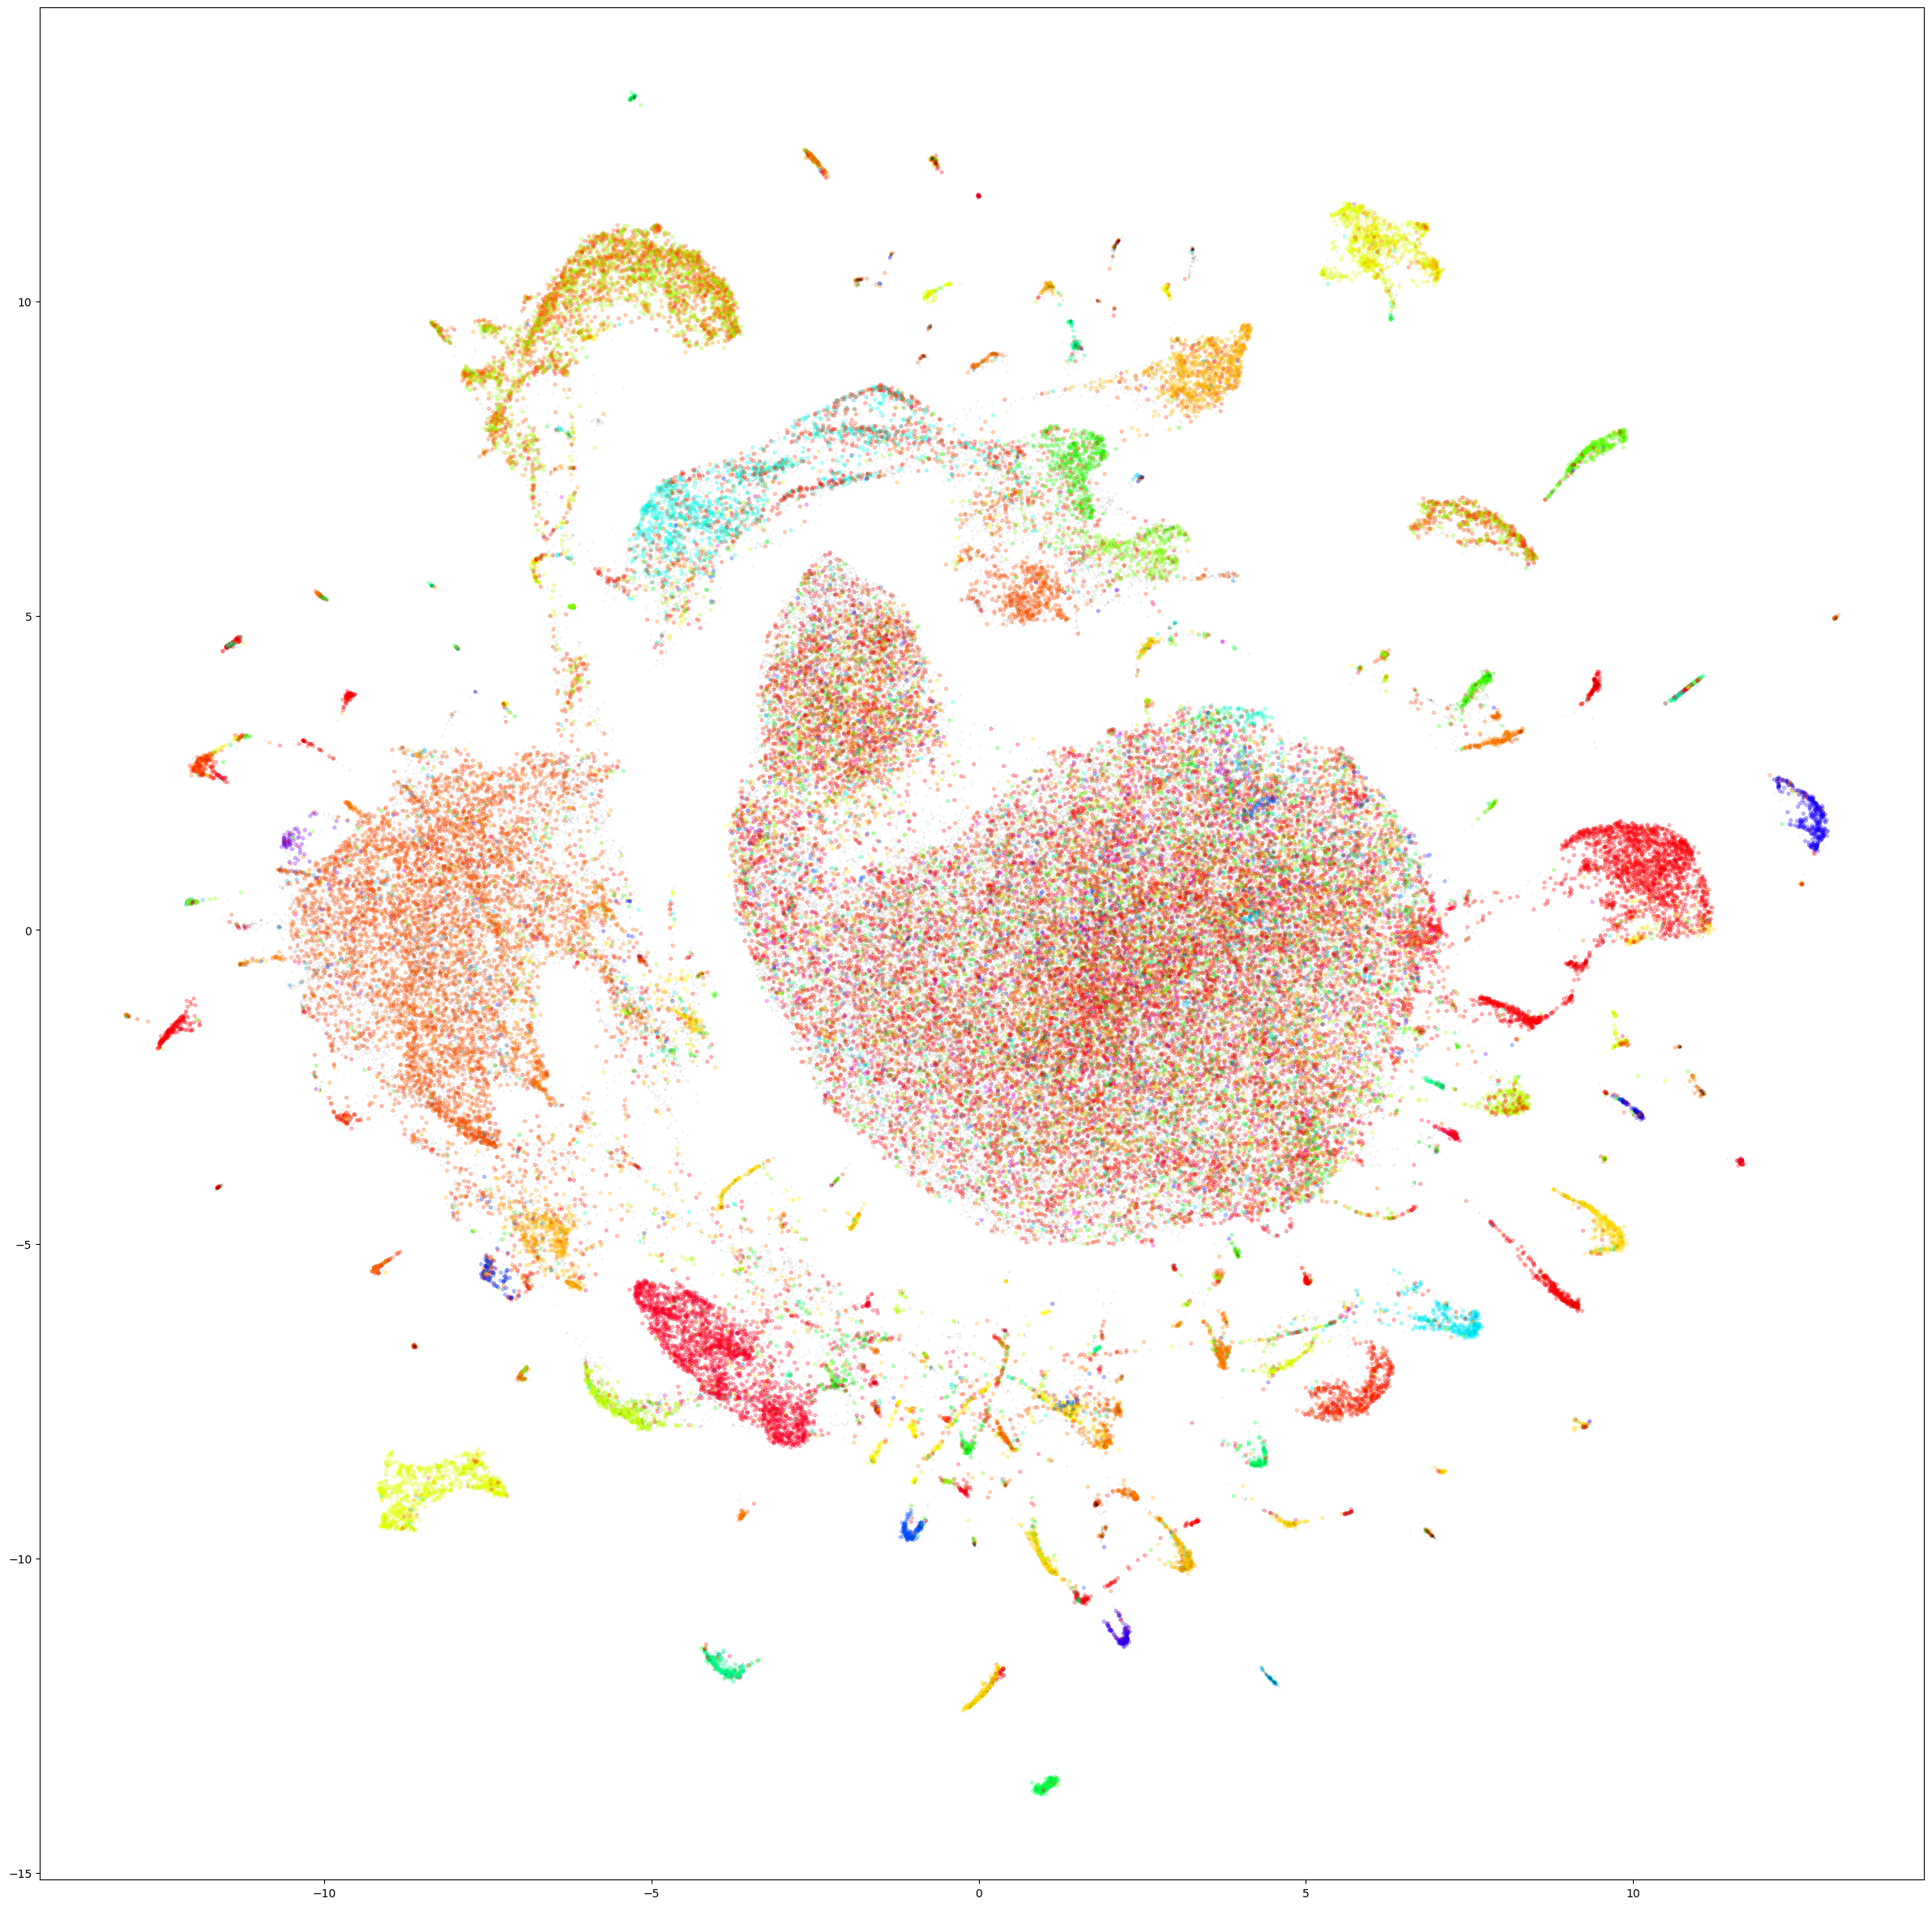

In [116]:
tmp = clusters_2[::100]!=-1
plt.figure(figsize=(30,30))
# ax = fig.add_subplot(projection='3d')
plt.scatter(Viz[tmp,0], 
           Viz[tmp,1], 
           # Viz[clusters_2[::50]!=-1][:,2],
           s = 8, c = clusters_2[::100][tmp], 
           cmap = 'gist_rainbow', alpha = 0.25)
tmp2=clusters_2[::100]==-1
plt.scatter(Viz[tmp2,0], 
           Viz[tmp2,1], 
           # Viz[clusters_2[::50]!=-1][:,2],
           s = 2, c = 'black', alpha = 0.03)
plt.savefig('Images/Improved_Plot.png')

In [25]:
label_Se = pd.concat(labels)

In [58]:
clusters_1 = np.load('Data_Performance_Comparison/HDBSCAN_RESULT_1.npy')

In [75]:
np.bincount(clusters_1+1)

array([8677483,   27320,   34186,   39659,   34067,   18299,   23214,
         45839,   19455,   27027, 5692866,   44483])

In [115]:
np.bincount(clusters_2+1)

array([8668030,  748203,  734527,  306253,  633725,  770003,  267571,
        278081,  208657,  171722,  115381,  232975,  138913,  221094,
        116139,   81370,   68424,   90232,   33890,   31632,  106590,
         20414,   62891,   42188,   29839,  129459,   47936,   43275,
         18479,    8218,    8359,   36072,   16292,   19983,   34014,
         18978,    7086,   10081,   17168,   32867,   20158,   15488,
         14405,    6568,     268])

In [114]:
len(np.unique(clusters_2))

45